# University Graduation Predictions

## Project goals:

<div class="alert alert-block alert-info">
<b>Highlights:</b>
</br>

* identify features of wine that influence whether or not a student graduates.
</br>

* Visualize relationships between variables
</br>

* use classification models to predict whether or not a student graduates.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import project
import sklearn.preprocessing
import warnings
warnings.filterwarnings("ignore")


## Acquire

<div class="alert alert-block alert-info">
<b>Highlights:</b>
</br>

* Data was obtained from kaggle.com
</br>

* Data was obtained 2/13/2023
</br>

* Dataframe had 4,424 rows by 35 columns before preparing
</br>

* Each row represents a studen and each column is a feature of that student
    

In [2]:
df = project.acquire_grads()
# this function acquires data from csv file in repo

# Prepare

<div class="alert alert-block alert-info">
<b>Highlights:</b>
</br>

* There were no null values in the dataset
</br>

* Numeric values were changed to their string equivalents
</br>

* to see changes, view project.py file
</br>

    

In [3]:
df = project.prep_grads(df)
df
#this function changes most of the numeric values and replaces them with the words
# it also drops some unecessary columns

,Marital status,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Educational special needs,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Target
0,single,Animation,1,high school only,european,no high school,no high school,service,trade,0,1,1,0,20,Dropout
1,single,tourism,1,high school only,european,high school only,bachelor's degree,STEM,STEM,0,0,1,0,19,Graduate
2,single,communication,1,high school only,european,no high school,no high school,trade,trade,0,0,1,0,19,Dropout
3,single,communication,1,high school only,european,no high school,no high school,service,STEM,0,1,0,0,20,Graduate
4,married,social service,0,high school only,european,no high school,no high school,trade,trade,0,1,0,0,45,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,single,communication,1,high school only,european,high school only,high school only,service,service,0,1,1,0,19,Graduate
4420,single,communication,1,high school only,asian,high school only,high school only,trade,trade,0,0,0,0,18,Dropout
4421,single,nursing,1,high school only,european,no high school,no high school,trade,trade,0,1,0,1,30,Dropout
4422,single,management,1,high school only,european,no high school,no high school,trade,service,0,1,0,1,20,Graduate


# Exploration

* Does marital status effect graduation?
* Does age at enrollment affect graduation?
* Does nationality affect graduation?
* Does mother' occupation level affect graduation?
* Does father's education affect graduation?

## Does marital status affect graduation?

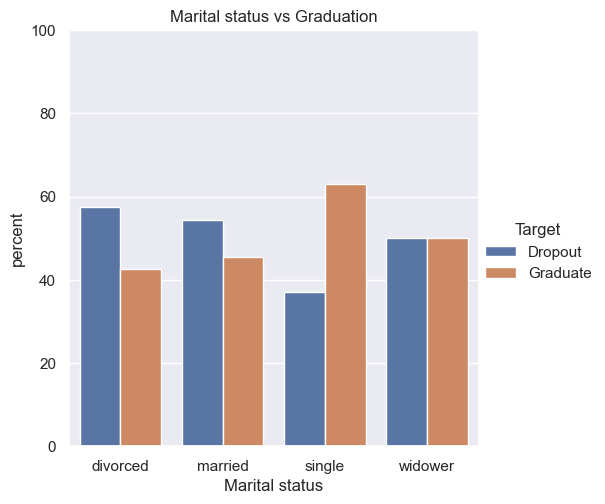

In [4]:
project.count_plots(df, 'Marital status', 'Target')
plt.title('Marital status vs Graduation')
plt.show()
#visual of percentage of each marital status that droped out of graduated

### Chi squared test to determine if a relationship exists between Marital status and Graduation

$H_0$ : There is no relationship between marital status and graduation

$H_a$ : There is a relationship between marital status and graduation

In [5]:

observed = pd.crosstab(df.Target, df['Marital status'])
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p 
# this creates a crosstab of marital status and graduation factors and then puts them into the chi2 test function

(51.80357467344271, 3.2981456114704644e-11)

<div class="alert alert-block alert-success">
<b>Highlights:</b>
</br>

* There is enough evidence to reject the null hypothesis and determine that there is a relationship between the two variables
</br>

    

## Does age at enrollment affect graduation?

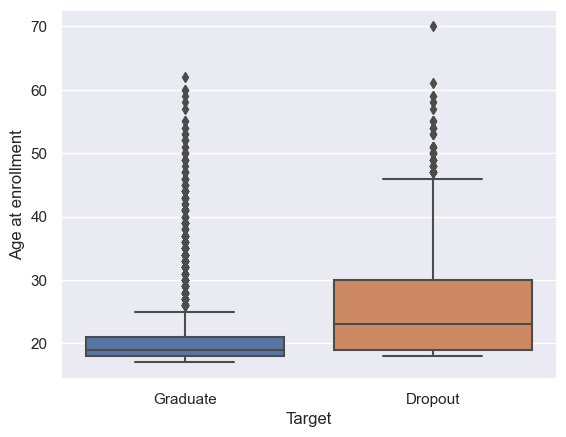

In [20]:
sns.boxplot(data = df, x = 'Target', y = 'Age at enrollment', order = ['Graduate', 'Dropout'])
plt.show()
#plots a box plot 

### Chi squared test to determine if a relationship exists between age at enrollment and Graduation

$H_0$ : There is no relationship between age at enrollment and graduation

$H_a$ : There is a relationship between age at enrollment and graduation

In [7]:
observed = pd.crosstab(df.Target, df['Age at enrollment'])
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p 
#cross tab and then chi2 test

(476.65759642443675, 1.85433588705395e-73)

<div class="alert alert-block alert-success">
<b>Highlights:</b>
</br>

* There is enough evidence to reject the null hypothesis and determine that there is a relationship between the two variables
</br>

    

# Does nationality affect graduation?

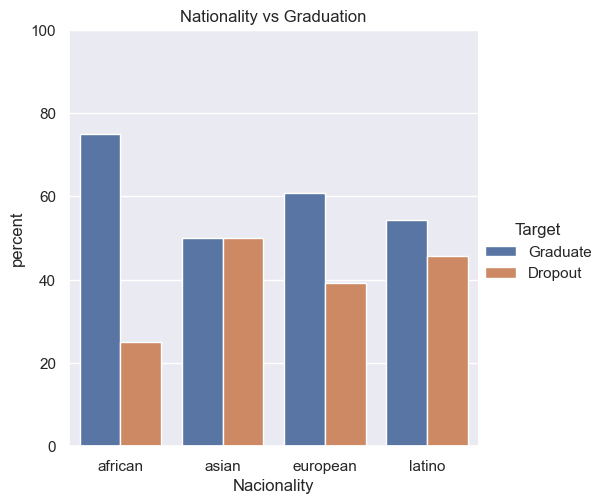

In [8]:
project.count_plots(df, 'Nacionality', 'Target')
plt.title('Nationality vs Graduation')
plt.show()

# graph that shows percentages of each nationality that graduated or droped ou

### Chi squared test to determine if a relationship exists between nationality and Graduation

$H_0$ : There is no relationship between nationality and graduation

$H_a$ : There is a relationship between nationality and graduation

In [9]:
observed = pd.crosstab(df.Target, df['Nacionality'])
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p 

#chi2 test

(3.1855188865064274, 0.3638967134481268)

<div class="alert alert-block alert-success">
<b>Highlights:</b>
</br>

* There is NOT enough evidence to determine that there is a relationship between the two variables.
</br>


# Does mother's education level affect graduation?

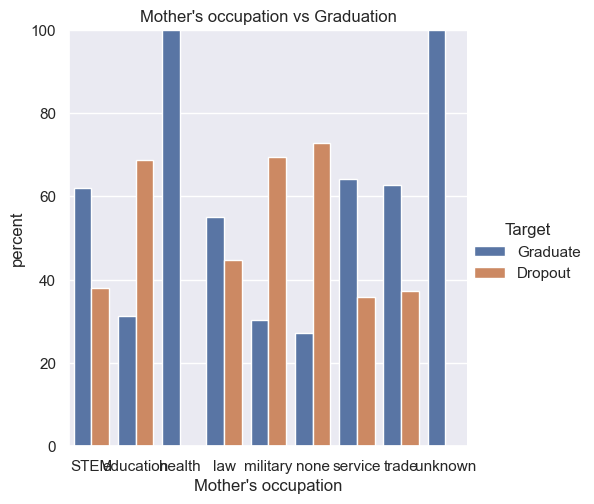

In [10]:

project.count_plots(df, 'Mother\'s occupation', 'Target')
sns.set(font_scale = 1)
plt.title('Mother\'s occupation vs Graduation')
plt.show()

### Chi squared test to determine if a relationship exists between mother's occupation and Graduation

$H_0$ : There is no relationship between mother's occupation and graduation

$H_a$ : There is a relationship between mother's occupation and graduation

In [11]:
observed = pd.crosstab(df.Target, df['Mother\'s occupation'])
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p

(109.04448871632268, 5.98366716692188e-20)

<div class="alert alert-block alert-success">
<b>Highlights:</b>
</br>

* There is enough evidence to determine that there is a relationship between the two variables.
</br>

# Is there a relationship between father's education and graduation?

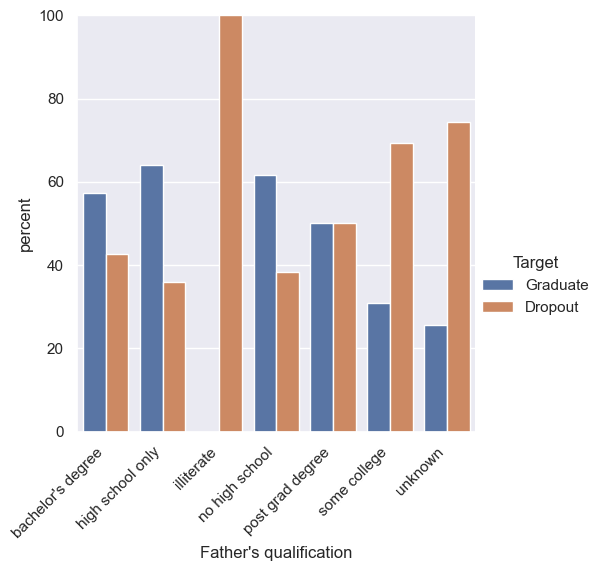

In [12]:
x,y = 'Father\'s qualification', 'Target'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)

g.ax.set_ylim(0,100)
plt.xticks(rotation=45, ha='right')


for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    
plt.show()

### Chi squared test to determine if a relationship exists between father's education and Graduation

$H_0$ : There is no relationship between father's education and graduation

$H_a$ : There is a relationship between father's education and graduation

In [13]:
observed = pd.crosstab(df.Target, df['Father\'s qualification'])
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p
#chi2 test

(80.25232897829437, 3.1687742438418386e-15)

<div class="alert alert-block alert-success">
<b>Highlights:</b>
</br>

* There is enough evidence to determine that there is a relationship between the two variables.
</br>

# Exploration Summary

<div class="alert alert-block alert-success">
<b>Highlights:</b>
</br>

* There is a relationship between student's marital status and graduation
</br>

* A relationship exists between age at enrollment and graduation. Younger student's are more likely to graduate
</br>

* There is no signifigant relationship between nationality and whether or not a student graduates, however it appears that african students are more likely to graduate
</br>

* Father's education level seems to have a relationship with graduation
</br>

* Graduation and mother's occupation have a relatively weak relationship

# Modeling

In [14]:
train, test, validate = project.dummies(df)
#adds dummies and splits data

In [15]:
project.model_tests(train, validate)
# function runs KNN, decision tree, and random forest models and returns
# a dataframe with the accuracy of each train and validate dataframes

,model,baseline,train accuracy,validate accuracy
0,KNN,0.60854,0.731299,0.737385
0,decision tree,0.60854,0.781004,0.793578
0,random forest,0.60854,0.805118,0.791284


<div class="alert alert-block alert-info">
<b>Summary:</b>
</br>
* Decision tree and random forest performed similarily
    </br>
* Random forest appears to have the best accuracy and beat the baseline by 20%
</br>
* Random forest will be used on the test dataset
</br>

In [16]:
project.testdf(test)

0.8236914600550964

# Conclusion

## Summary

<div class="alert alert-block alert-info">


* There is a relationship between student's marital status and graduation
</br>

* A relationship exists between age at enrollment and graduation. Younger student's are more likely to graduate
</br>

* There is no signifigant relationship between nationality and whether or not a student graduates, however it appears that african students are more likely to graduate
</br>

* Father's education level seems to have a relationship with graduation
</br>

* Graduation and mother's occupation have a relatively weak relationship
</br>

* Decision tree and random forest model performed similarily
</br>

* Random forest model performed the best on train and validate.
</br>

* Random forest model on test dataframe outperformed baseline by 20%

## Recommendations

<div class="alert alert-block alert-warning">


* Collect more data on students at one particular college and make model
</br>

* Allocate funds and give more support to students who are married or are considered first generation students
</br>

* Encourage younger people to apply and enroll in college

## Next Steps

<div class="alert alert-block alert-warning">


* Try new features and combinations to improve accuracy of model
</br>

* Create new visuals through Tableau
</br>

* Create more functions to simplify process
</br>

* Develop model using academic data
